In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD
import operator

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
ls

 Volume in drive C is BOOTCAMP
 Volume Serial Number is F211-E14E

 Directory of C:\Users\mac\Desktop\Data2018\Customer_Classification

02/09/2018  08:00 AM    <DIR>          .
02/09/2018  08:00 AM    <DIR>          ..
02/07/2018  09:47 PM    <DIR>          .ipynb_checkpoints
02/09/2018  08:00 AM            53,792 Classification.ipynb
05/25/2017  08:51 PM         7,980,833 Clothing_Store.csv
09/12/2017  10:54 PM         6,597,229 Data-Mining-Methods-and-Models-Larose-2006.pdf
               3 File(s)     14,631,854 bytes
               3 Dir(s)  70,319,280,128 bytes free


In [3]:
df=pd.read_csv('Clothing_Store.csv')

In [4]:
df.head()

,HHKEY,ZIP_CODE,REC,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,STORELOY,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,9955600066402,1001,208,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,0.0,0.25,0.00,0.19,0.00,0.0,0.0,0.000000,0.02,0.03,0.29,0.0,0.0,368.46,0.0,0.00,0.00,0.00,0.00,0.60,17,666,333.00,0.08,9,1,11,1,7,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,9955600073501,1028,6,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,0.0,0.18,0.14,0.00,0.18,0.0,0.0,0.000000,0.00,0.02,0.37,0.0,0.0,258.00,0.0,138.00,55.99,258.00,0.00,0.54,14,696,174.00,0.33,6,0,14,1,7,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,9955600076313,1056,327,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000000,0.00,0.00,0.00,0.0,0.0,77.00,0.0,0.00,0.00,0.00,39.00,0.62,10,343,171.50,0.11,1,0,2,1,7,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,9955600078045,1118,66,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,0.2,0.17,0.00,0.05,0.00,0.0,0.0,0.005307,0.03,0.01,0.00,0.0,0.0,846.06,0.0,104.94,0.00,373.87,166.25,0.43,24,701,87.62,0.29,15,3,35,1,7,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,9955600078517,1107,49,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,0.0,0.00,0.41,0.00,0.00,0.0,0.0,0.170000,0.00,0.00,0.00,0.0,0.0,87.44,0.0,87.44,0.00,87.44,0.00,0.22,0,49,49.00,0.42,4,0,8,1,7,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [5]:
df.shape

(21740, 51)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21740 entries, 0 to 21739
Data columns (total 51 columns):
HHKEY           21740 non-null int64
ZIP_CODE        21740 non-null int64
REC             21740 non-null int64
FRE             21740 non-null int64
MON             21740 non-null float64
CC_CARD         21740 non-null int64
AVRG            21740 non-null float64
PC_CALC20       21740 non-null int64
PSWEATERS       21740 non-null float64
PKNIT_TOPS      21740 non-null float64
PKNIT_DRES      21740 non-null float64
PBLOUSES        21740 non-null float64
PJACKETS        21740 non-null float64
PCAR_PNTS       21740 non-null float64
PCAS_PNTS       21740 non-null float64
PSHIRTS         21740 non-null float64
PDRESSES        21740 non-null float64
PSUITS          21740 non-null float64
POUTERWEAR      21740 non-null float64
PJEWELRY        21740 non-null float64
PFASHION        21740 non-null float64
PLEGWEAR        21740 non-null float64
PCOLLSPND       21740 non-null float64
AMSPEN

In [7]:
df.isnull().sum()

HHKEY           0
ZIP_CODE        0
REC             0
FRE             0
MON             0
CC_CARD         0
AVRG            0
PC_CALC20       0
PSWEATERS       0
PKNIT_TOPS      0
PKNIT_DRES      0
PBLOUSES        0
PJACKETS        0
PCAR_PNTS       0
PCAS_PNTS       0
PSHIRTS         0
PDRESSES        0
PSUITS          0
POUTERWEAR      0
PJEWELRY        0
PFASHION        0
PLEGWEAR        0
PCOLLSPND       0
AMSPEND         0
PSSPEND         0
CCSPEND         0
AXSPEND         0
TMONSPEND       0
OMONSPEND       0
SMONSPEND       0
PREVPD          0
GMP             0
PROMOS          0
DAYS            0
FREDAYS         0
MARKDOWN        0
CLASSES         0
COUPONS         0
STYLES          0
STORES          0
STORELOY        0
VALPHON         0
WEB             0
MAILED          0
RESPONDED       0
RESPONSERATE    0
HI              0
LTFREDAY        0
CLUSTYPE        0
PERCRET         0
RESP            0
dtype: int64

#### Get numerical and categorical variables. 

In [8]:
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10:
        print v, l

CC_CARD [0 1]
PC_CALC20 [11 16 19 18 15 17]
VALPHON ['N' 'Y']
WEB [0 1]
RESP [0 1]


In [9]:
variables={}
for v in df.columns:
    l=df[v].unique()
    variables[v]=len(l)

In [10]:
variables_sorted = sorted(variables.items(), key=operator.itemgetter(1),reverse=True)
variables_sorted

[('HHKEY', 21740),
 ('MON', 14093),
 ('CCSPEND', 11358),
 ('AVRG', 11078),
 ('SMONSPEND', 9692),
 ('ZIP_CODE', 7419),
 ('HI', 6506),
 ('PSSPEND', 6303),
 ('TMONSPEND', 5879),
 ('LTFREDAY', 5581),
 ('FREDAYS', 4147),
 ('PREVPD', 2902),
 ('OMONSPEND', 2237),
 ('AXSPEND', 1969),
 ('STORELOY', 1076),
 ('PLEGWEAR', 1023),
 ('PJEWELRY', 910),
 ('AMSPEND', 769),
 ('DAYS', 693),
 ('PKNIT_TOPS', 515),
 ('PFASHION', 478),
 ('REC', 362),
 ('PERCRET', 355),
 ('PKNIT_DRES', 317),
 ('STYLES', 220),
 ('PCAS_PNTS', 203),
 ('PDRESSES', 161),
 ('PBLOUSES', 161),
 ('PSHIRTS', 149),
 ('MARKDOWN', 140),
 ('PCOLLSPND', 139),
 ('PCAR_PNTS', 136),
 ('PSWEATERS', 135),
 ('POUTERWEAR', 133),
 ('PJACKETS', 121),
 ('PSUITS', 113),
 ('GMP', 97),
 ('FRE', 76),
 ('CLUSTYPE', 51),
 ('RESPONSERATE', 43),
 ('PROMOS', 38),
 ('CLASSES', 36),
 ('COUPONS', 25),
 ('STORES', 18),
 ('MAILED', 12),
 ('RESPONDED', 12),
 ('PC_CALC20', 6),
 ('VALPHON', 2),
 ('WEB', 2),
 ('RESP', 2),
 ('CC_CARD', 2)]

In [11]:
[  variables_sorted[i][0] for i in range(len(variables_sorted))]

['HHKEY',
 'MON',
 'CCSPEND',
 'AVRG',
 'SMONSPEND',
 'ZIP_CODE',
 'HI',
 'PSSPEND',
 'TMONSPEND',
 'LTFREDAY',
 'FREDAYS',
 'PREVPD',
 'OMONSPEND',
 'AXSPEND',
 'STORELOY',
 'PLEGWEAR',
 'PJEWELRY',
 'AMSPEND',
 'DAYS',
 'PKNIT_TOPS',
 'PFASHION',
 'REC',
 'PERCRET',
 'PKNIT_DRES',
 'STYLES',
 'PCAS_PNTS',
 'PDRESSES',
 'PBLOUSES',
 'PSHIRTS',
 'MARKDOWN',
 'PCOLLSPND',
 'PCAR_PNTS',
 'PSWEATERS',
 'POUTERWEAR',
 'PJACKETS',
 'PSUITS',
 'GMP',
 'FRE',
 'CLUSTYPE',
 'RESPONSERATE',
 'PROMOS',
 'CLASSES',
 'COUPONS',
 'STORES',
 'MAILED',
 'RESPONDED',
 'PC_CALC20',
 'VALPHON',
 'WEB',
 'RESP',
 'CC_CARD']

In [12]:
list(df.columns[map(lambda x:str(x)[0]=='P',df.columns)])

['PC_CALC20',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',
 'PSSPEND',
 'PREVPD',
 'PROMOS',
 'PERCRET']

In [13]:
numerical_variable_list=[ 'MON',
 'CCSPEND',
 'AVRG',
 'SMONSPEND',
#  'ZIP_CODE',
 'HI',
 'PSSPEND',
 'TMONSPEND',
 'LTFREDAY',
 'FREDAYS',
 'PREVPD',
 'OMONSPEND',
 'AXSPEND',
#  'STORELOY',
'AMSPEND',
 'DAYS',
          'PERCRET',
     'STYLES',     
                             'MARKDOWN',
                             'GMP',
 'FRE',
'RESPONSERATE',
 'PROMOS',
 'CLASSES',
 'COUPONS',
 'STORES',
 'MAILED',
 'RESPONDED',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',]

In [14]:
len(numerical_variable_list)

41

In [16]:
catigorical_variable_list=[
     'VALPHON',
 'WEB',
#  'RESP',
 'CC_CARD'
]

In [17]:
len(catigorical_variable_list)

3

#### EDA for continuous features and indicators

#### continuous features

In [24]:
table=pd.crosstab(df['MON'],df['RESP'])
table
table=table.div(table.sum(1).astype(float), axis=0)
table

RESP,0,1
MON,,
0.99,1.000000,0.000000
1.99,1.000000,0.000000
4.00,1.000000,0.000000
4.18,1.000000,0.000000
4.99,1.000000,0.000000
5.00,1.000000,0.000000
5.98,1.000000,0.000000
5.99,1.000000,0.000000
6.00,0.666667,0.333333


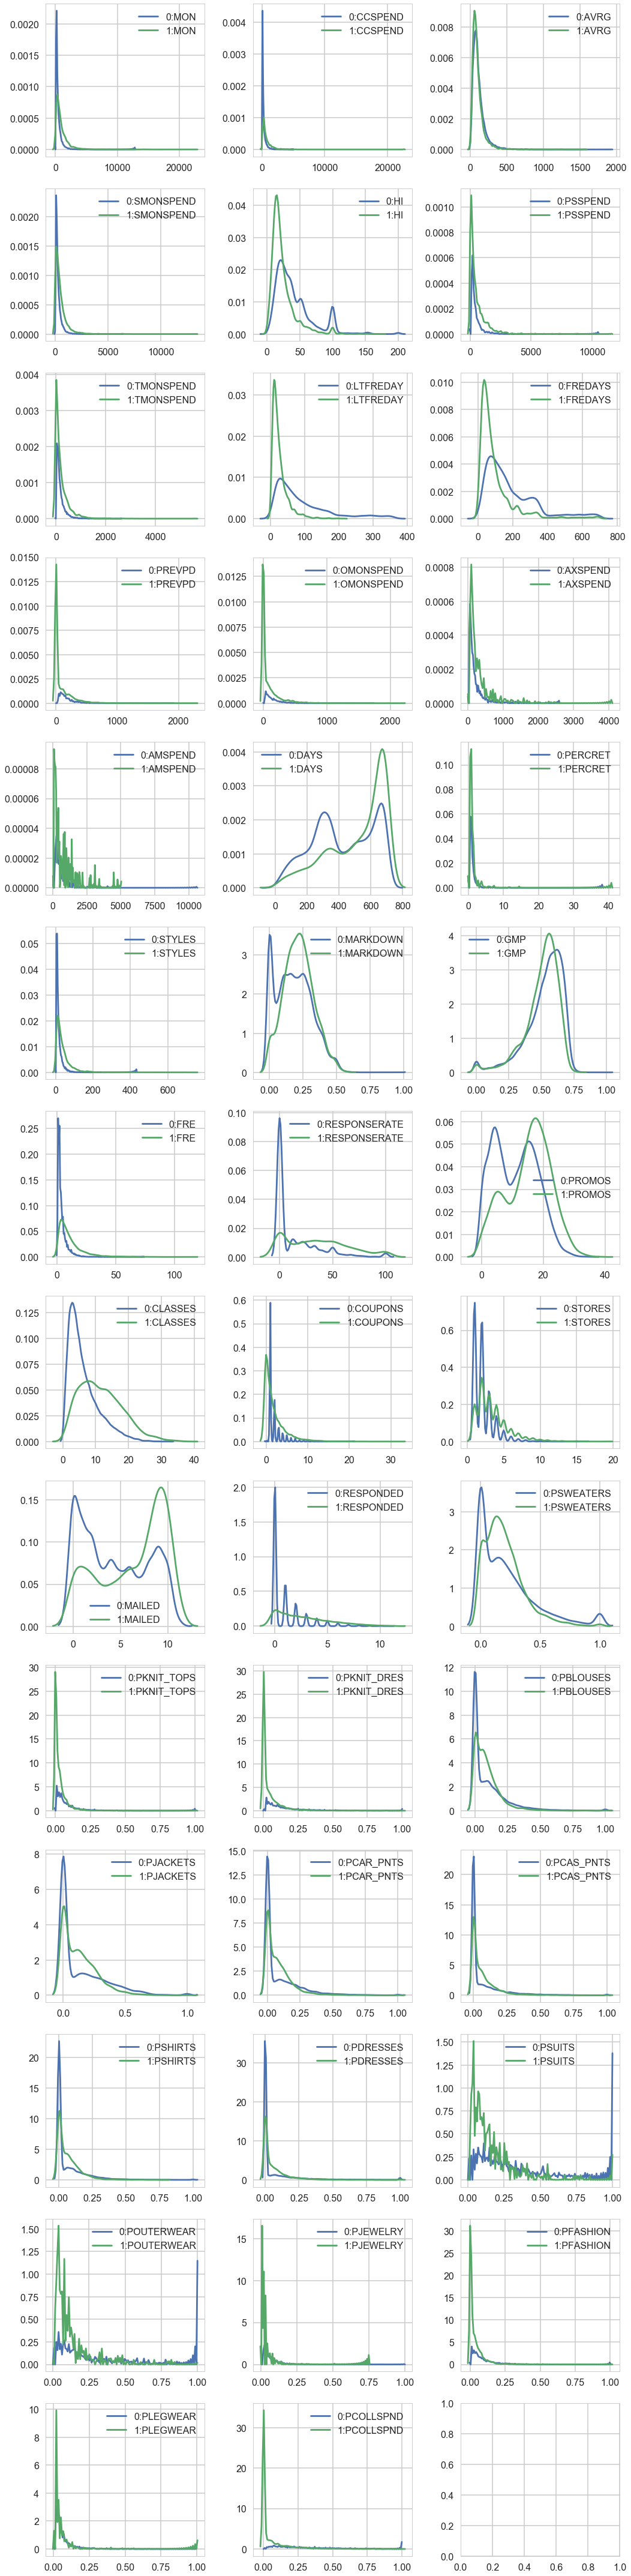

In [29]:
dfgb=df.groupby('RESP')
fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(15, 60), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), numerical_variable_list):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name)
# plt.savefig('Univariate Analysis Quantatitive Variable')
plt.show()

#### indicators

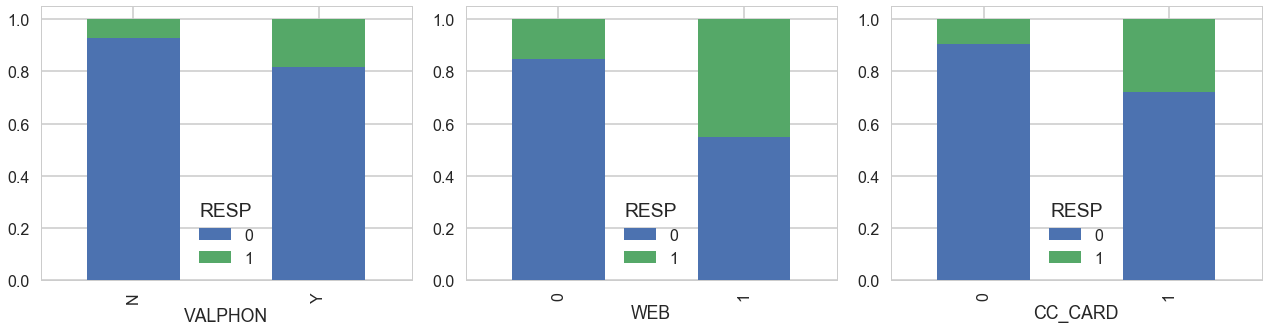

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), 
                         tight_layout=True)

for ax, p in zip(axes.ravel(), catigorical_variable_list): 
    table=pd.crosstab(data[p],df['RESP'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax,stacked='True')
# plt.savefig('Univariate Analysis Categorical Variable')
plt.show()

In [25]:
table=pd.crosstab(df['WEB'],df['RESP'])
table
table=table.div(table.sum(1).astype(float), axis=0)
table

RESP,0,1
WEB,,
0,0.846283,0.153717
1,0.548173,0.451827
